### Assignment 9

### Exercise 3.1
Given a 2 period binomial mode, we need to find a value for $r \in (-1,\infty )$ 
That is able to satisfy no arbitrage.

If we can recount the rule is as follows:

$$d < r+1 < u$$

We can already define the value of $u,d$ therefore we can calculate the interest rates by substituting d,u and subtracting 1 to obtain the range of values.

$$-\frac{2}{3} < r < 2$$

### Exercise 3.2

We can see that the values of X belong on [1/2,1]. I believe this means that We can sample the uniform distribution of these values and substitute within thos parameters to find the final value.

In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [18]:
def PayoffGeneration(r,u,d,size):
    ptilde= (1+r-d)/(u-d)
    U = np.random.uniform(low=0.5,high=1,size=size)
    payoffs = []
    for x in U:
        outcome = np.random.choice([0,1,2,3],p=[ptilde**2,ptilde*(1-ptilde),ptilde*(1-ptilde),(1-ptilde)**2])
        if outcome == 0:
            payoffs.append(1-x)
        elif outcome ==1:
            payoffs.append(x)
        elif outcome ==2:
            payoffs.append(x)
        elif outcome ==3:
            payoffs.append(x-0.5)
    return np.array(payoffs)


In [23]:
sample_size = 10_000
r = 2/3
u = 3
d = 1/3
T = 2

In [29]:
Payoffs = PayoffGeneration(r,u,d,sample_size);

Payoffs = Payoffs / (1+r)**T
print("Monte Carlos Generated payoff: {:.5f}".format(Payoffs.mean()))

Monte Carlos Generated payoff: 0.18077


Fairly certain this may be right, but just calculated in the wrong mannerism. Using the N binomial method would mean calculating dn and rn.

This was actually all wrong, the method you were supposed to use entails the 2 period binomial method. What that means is to utilize the hand written formula and obtain an answer in terms of x.

Although in the method described in the video, we do the Summated probabilities of the outcomes. I.e. for the "Heads" in the outcome 

HH/HT we multiply by ptilde, and with T we multiply by 1-ptilde:

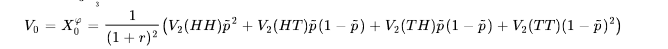

As you can see, we have the values for p etc and all the representations of x as well as r.

The way to use the Binomial model, for calculating payoffs, is to summate the payoffs at the final maturity date T. This can be done with manually calculating the probabilities of each outcome correpsonding to the H/T resultants.

"We are looking at linear combinations of payoffs"

### Exercise 37

What do i not get about this concept?

1. How to recursively calculate a payoff? Surely we need all values of S to calculate the Y if its just the summated value of all stocks at that time period.

Wrong, the value of YN is all of the Stock prices upto that point summated. This means for Y(HHH) its S(H) + S(HH) + S(HHH)

We have to develop a recursive function to calculate this value vn. Im guessing that means we specify a n, and input the starting price.

**After class:**

Okay, the actual way to compute this is more straightforward. What we need todo is look at the possible outcomes and what the question gives us. If the maturity date is small, we can count on there being just a few outcomes of the stock prices.

We are given u,d,S_0, hence we can calculate and sum up all the Y's at 3 easily.






2. The layout of how they are asking for recursion. Are they wanting us to use S_0 price?

They probabily want us to use the parameters.




### Exercise 38.1
Generate 12 Uniform distributions $$U_i \sim Unif[-\frac{1}{2}\frac{1}{2}]$$

Then summate all 12 for the distribution Z


In [50]:
sample_size = 10**7

In [53]:
def Zdistribution(size):
    Z = 0
    for i in range(12):
        U = np.random.uniform(low=-0.5,high=0.5,size=size)
        Z+=U


    return Z

### Exercise 38.2

The distribution of Z could be seen as an approximate standard normal distribution. In the demonstration done in the Exercise before, we can see how the value of Z's mean and variance reaches 0 and 1 as the number of samples increases. The values asymptope to the true values of 0 and 1. 

The standard Normal distribution also has a variance and mean of 1 and 0 respectively, so as an approximation these are equal like so:

$$Z \approx N\sim Norm(0,1)$$


### Exercise 38.3

Here is both the antiquated Standard Normal Distribution generation, and numpy's generation of Standard Normal Distribution.


In [55]:
sample_size = 10_000_000
Z = Zdistribution(sample_size)
N = np.random.standard_normal(sample_size)

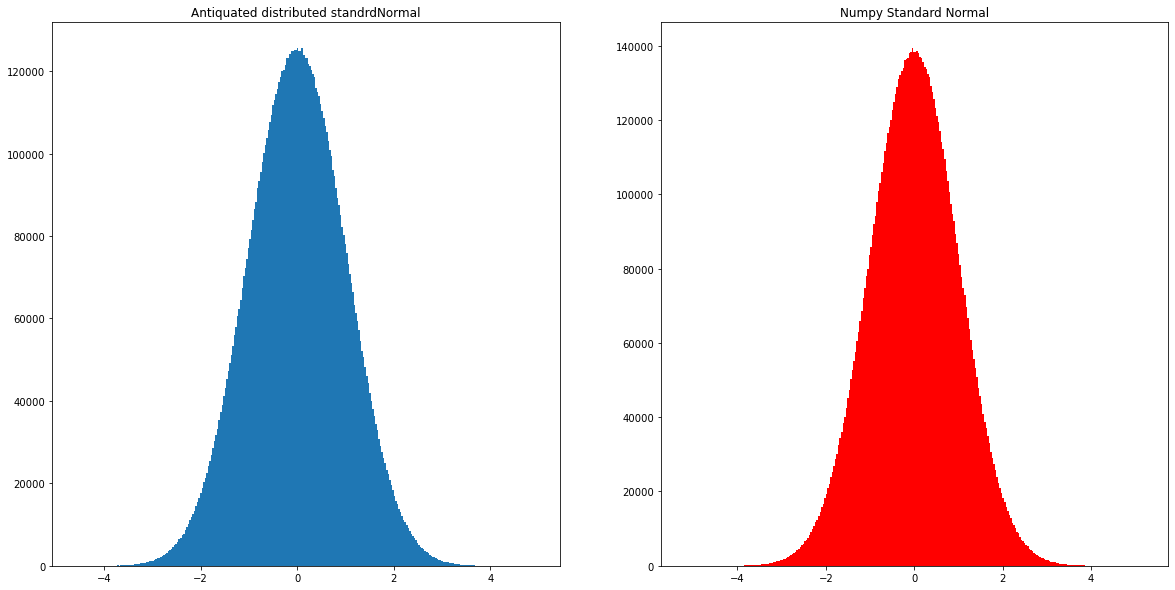

In [65]:
fig, ax = plt.subplots(ncols = 2,nrows=1,figsize=(20,10))
ax[0].hist(Z,bins=300)
ax[0].set_title("Antiquated distributed standrdNormal")

ax[1].hist(N,bins=300,color='red')
ax[1].set_title("Numpy Standard Normal");